====================================================================================================================
# PART ONE 
====================================================================================================================


**• DOMAIN:** Semiconductor manufacturing process

**• CONTEXT:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/ variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors
contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

**• DATA DESCRIPTION:** sensor-data.csv : (1567, 592)

The data consists of 1567 examples each with 591 features. 

The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. 

Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

**• PROJECT OBJECTIVE:** We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

In [1]:
#Import Libraries
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image
from sklearn.tree import plot_tree

from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # adds a nice background to the graphs
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score,f1_score
import os
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
# Confusion Matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import AgglomerativeClustering 
from IPython.display import display
from scipy.spatial.distance import cdist
from pandas.api.types import is_numeric_dtype
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from scipy.cluster.hierarchy import fcluster
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer



-------------

### 1. Import and explore the data.

In [2]:
df1 = pd.read_csv("signal-data.csv")

In [3]:
df1.shape

(1567, 592)

**Here we have 1567 rows and 592 columns**

In [4]:
df1.head(3)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


--------------------------

### 2. Data cleansing:

**• Missing value treatment.**

**• Drop attribute/s if required using relevant functional knowledge.**

**• Make all relevant modifications on the data using both functional/logical reasoning/assumptions**

**• Missing value treatment.**

In [6]:
df1.isnull().sum().sum()

41951

**We have 41951 missing values, which is huge**

In [7]:
df1.isnull().sum().max()

1429

**Maximum null value in a column is 1429.**

In [8]:
for column in df1.columns:
    null_val = df1[column].isnull().sum()
    if null_val > (1567/4) :
        print(null_val)

794
794
1341
1018
1018
1018
715
1429
1429
1341
1018
1018
1018
715
1429
1429
794
794
1341
1018
1018
1018
715
1341
1018
1018
1018
715
949
949
949
949


**We have lots of columns with large numbers of missing values**

**Replacing all the NaN values with 0 as the values correspond to the test results.**

**Since, the values are not present that means the values are not available or calculated.**

**Lets Drop columns with more than 25% missing values**

**Absence of a signal is assumed to be no signal in the dataset**

**So better we not take median or mean and replace them with zeros**

In [9]:
missing_value_columns = df1.columns[df1.isna().mean() >= 0.25]
df2 = df1.drop(missing_value_columns, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 560 entries, Time to Pass/Fail
dtypes: float64(558), int64(1), object(1)
memory usage: 6.7+ MB


In [10]:
df2 = df2.replace(np.NaN, 0)

# again, checking if there is any NULL values left
df2.isnull().any().any()

False

**We have dropped the columns with very high number of missing values. And replace the nan with 0**

**• Drop attribute/s if required using relevant functional knowledge.**


**• Make all relevant modifications on the data using both functional/logical reasoning/assumptions**

In [11]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3002.910638,2484.700932,2180.887035,1383.901023,4.159516,99.106573,100.209538,0.121122,1.460995,-0.000840,...,16.642363,0.499777,0.015308,0.003844,3.065869,0.021445,0.016464,0.005280,99.606461,-0.867262
std,200.204648,184.815753,209.206773,458.937272,56.104457,9.412812,11.363940,0.012831,0.090461,0.015107,...,12.485267,0.013084,0.017179,0.003721,3.577730,0.012366,0.008815,0.002869,93.895701,0.498010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053400,...,4.582000,0.000000,0.000000,0.000000,0.000000,-0.016900,0.000000,0.000000,0.000000,-1.000000
25%,2965.670000,2451.515000,2180.700000,1080.116050,1.011000,100.000000,97.762200,0.121100,1.410950,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306200,0.013400,0.010600,0.003300,44.368600,-1.000000
50%,3010.920000,2498.910000,2200.955600,1283.436800,1.310100,100.000000,101.492200,0.122400,1.461500,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757600,0.020500,0.014800,0.004600,71.778000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,100.000000,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.000000,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [12]:
df2["Pass/Fail"].dtype

dtype('int64')

Text(0.5, 1.0, 'Correlation heatmap for the Data')

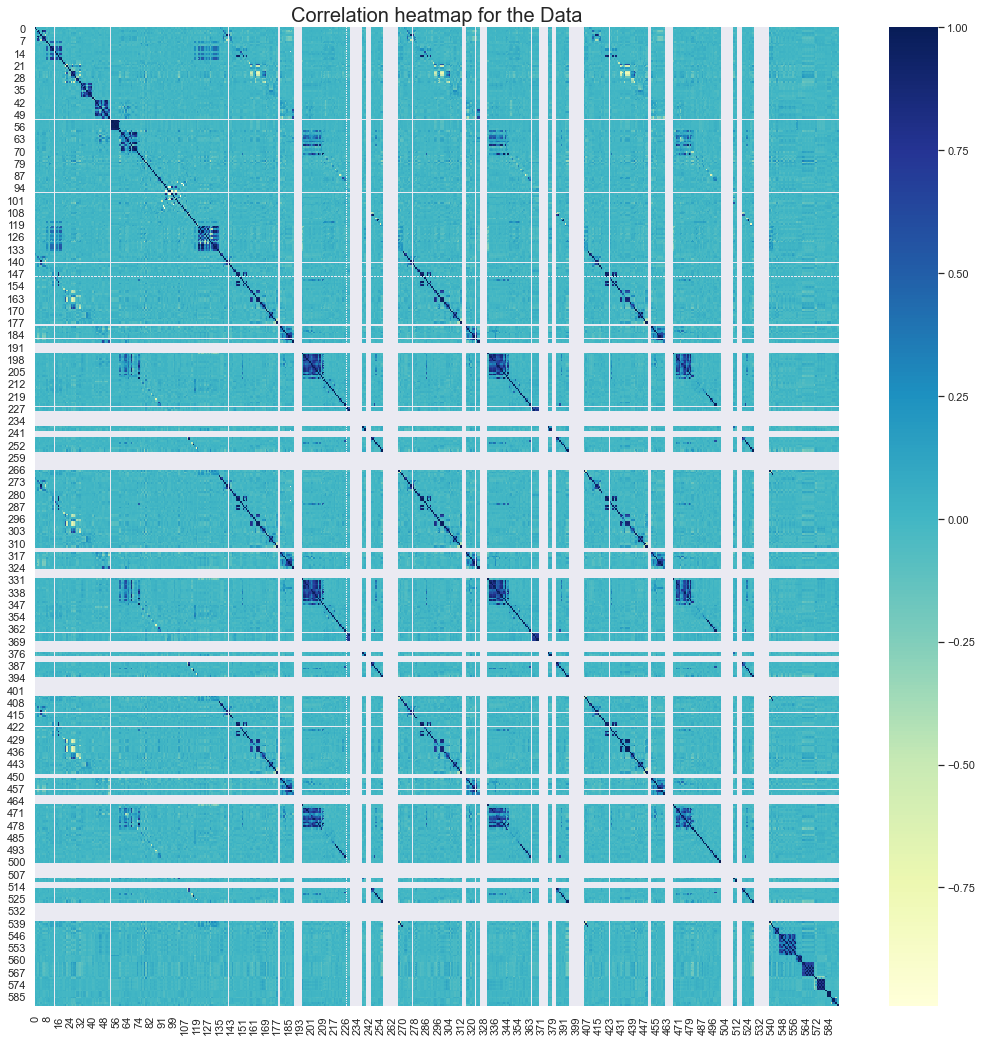

In [13]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(df2.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

**We can see that there are few highly colinear data present. Hence we can remove the colinear data.**

In [14]:
def remove_collinear_features(x, threshold):

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [15]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
data = remove_collinear_features(df2,0.70)

5 | 2 | 0.99
6 | 2 | 0.82
6 | 5 | 0.84
7 | 2 | 0.75
7 | 5 | 0.77
12 | 11 | 0.83
17 | 11 | 0.81
18 | 11 | 0.72
18 | 12 | 0.79
18 | 17 | 0.9
22 | 21 | 0.75
26 | 25 | 0.83
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.88
35 | 34 | 0.83
37 | 32 | 0.75
37 | 34 | 0.75
38 | 32 | 0.72
38 | 34 | 0.72
38 | 36 | 0.71
38 | 37 | 0.97
39 | 32 | 0.81
39 | 34 | 0.91
39 | 35 | 0.71
39 | 37 | 0.86
39 | 38 | 0.84
43 | 42 | 0.82
44 | 42 | 0.82
46 | 42 | 0.84
46 | 43 | 0.84
46 | 45 | 0.74
48 | 44 | 0.77
49 | 42 | 1.0
49 | 43 | 0.82
49 | 44 | 0.82
49 | 46 | 0.84
50 | 42 | 0.88
50 | 43 | 0.9
50 | 46 | 0.97
50 | 49 | 0.88
51 | 47 | 0.71
54 | 53 | 1.0
55 | 53 | 0.95
55 | 54 | 0.95
56 | 53 | 0.98
56 | 54 | 0.97
56 | 55 | 0.96
57 | 53 | 0.97
57 | 54 | 0.96
57 | 55 | 0.98
57 | 56 | 0.99
58 | 53 | 0.93
58 | 54 | 0.93
58 | 55 | 0.92
58 | 56 | 0.96
58 | 57 | 0.94
61 | 60 | 0.88
65 | 64 | 0.85
66 | 60 | 0.97
66 | 61 | 0.84
66 | 62 | 0.75
68 | 60 | 0.85
68 | 61 | 0.87
68 | 66 | 0.85
69 | 60 | 0.96
69 | 61 |

427 | 425 | 0.88
428 | 155 | 1.0
428 | 290 | 0.96
429 | 156 | 1.0
429 | 291 | 0.99
430 | 159 | 0.87
430 | 163 | 0.83
430 | 164 | 0.88
430 | 165 | 0.85
430 | 294 | 0.89
430 | 298 | 0.84
430 | 299 | 0.87
430 | 300 | 0.85
431 | 160 | 0.81
431 | 163 | 0.81
431 | 164 | 0.85
431 | 165 | 0.81
431 | 294 | 0.72
431 | 295 | 0.83
431 | 298 | 0.83
431 | 299 | 0.85
431 | 300 | 0.82
431 | 430 | 0.9
434 | 26 | 0.77
434 | 159 | 0.71
434 | 163 | 0.88
434 | 164 | 0.9
434 | 165 | 0.86
434 | 294 | 0.75
434 | 298 | 0.89
434 | 299 | 0.89
434 | 300 | 0.86
434 | 430 | 0.95
434 | 431 | 0.93
435 | 26 | 0.77
435 | 159 | 0.71
435 | 163 | 0.84
435 | 164 | 0.91
435 | 165 | 0.87
435 | 294 | 0.75
435 | 298 | 0.86
435 | 299 | 0.9
435 | 300 | 0.86
435 | 430 | 0.95
435 | 431 | 0.93
435 | 434 | 0.99
436 | 26 | 0.76
436 | 159 | 0.71
436 | 163 | 0.84
436 | 164 | 0.9
436 | 165 | 0.88
436 | 294 | 0.75
436 | 298 | 0.86
436 | 299 | 0.9
436 | 300 | 0.87
436 | 430 | 0.95
436 | 431 | 0.93
436 | 434 | 0.99
436 | 435 | 1.0
437 | 16

In [16]:
# deleting the first column

data = data.drop(columns = ['Time'], axis = 1)

# checking the shape of the data after deleting a column
data.shape

(1567, 297)

In [17]:
data.head()

,0,1,2,3,4,8,9,10,11,13,...,565,570,571,572,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,1.5005,0.0162,-0.0034,0.9455,0.0,...,0.0000,533.8500,2.1113,8.95,0.5005,0.0118,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,1.4966,-0.0005,-0.0148,0.9627,0.0,...,0.0000,535.0164,2.4335,5.92,0.5019,0.0223,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,0.0041,0.0013,0.9615,0.0,...,0.6219,535.0245,2.0293,11.21,0.4958,0.0157,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,1.4882,-0.0124,-0.0033,0.9629,0.0,...,0.1630,530.5682,2.0253,9.33,0.4990,0.0103,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,1.5031,-0.0031,-0.0072,0.9569,0.0,...,0.0000,532.0155,2.0275,8.83,0.4800,0.4766,0.0202,0.0149,73.8432,-1


-------------------

### 3. Data analysis & visualisation:

**• Perform detailed relevant statistical analysis on the data.**

**• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.**

In [18]:
data.describe()

,0,1,2,3,4,8,9,10,11,13,...,565,570,571,572,582,583,586,587,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3002.910638,2484.700932,2180.887035,1383.901023,4.159516,1.460995,-0.000840,0.000146,0.963122,0.0,...,0.120242,530.523623,2.101836,28.450165,0.499777,0.015308,0.021445,0.016464,99.606461,-0.867262
std,200.204648,184.815753,209.206773,458.937272,56.104457,0.090461,0.015107,0.009296,0.036620,0.0,...,0.092119,17.499736,0.275112,86.304681,0.013084,0.017179,0.012366,0.008815,93.895701,0.498010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053400,-0.034900,0.000000,0.0,...,0.000000,317.196400,0.980200,3.540000,0.000000,0.000000,-0.016900,0.000000,0.000000,-1.000000
25%,2965.670000,2451.515000,2180.700000,1080.116050,1.011000,1.410950,-0.010800,-0.005600,0.958000,0.0,...,0.087700,530.702700,1.982900,7.500000,0.497900,0.011600,0.013400,0.010600,44.368600,-1.000000
50%,3010.920000,2498.910000,2200.955600,1283.436800,1.310100,1.461500,-0.001300,0.000400,0.965800,0.0,...,0.090300,532.398200,2.118600,8.650000,0.500200,0.013800,0.020500,0.014800,71.778000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,1.516850,0.008400,0.005900,0.971300,0.0,...,0.166850,534.356400,2.290650,10.130000,0.502350,0.016500,0.027600,0.020300,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,1.656400,0.074900,0.053000,0.984800,0.0,...,0.689200,589.508200,2.739500,454.560000,0.509800,0.476600,0.102800,0.079900,737.304800,1.000000


**Here we have very diverse and unscaled data present.**

**We have large number of data of -1 and very less data on 1**

**There are total 1567 rows**

**We can see very diverse standard deviations**

**Lets analyse the pass fail criteria**

In [19]:
def univariate_analysis_piechart_bargraph(dataset,criteria):
    f,axes=plt.subplots(1,2,figsize=(17,7))
    dataset[criteria].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
    sns.countplot(criteria,data=dataset,ax=axes[1])
    axes[0].set_title(f'{criteria} Variable Pie Chart')
    axes[1].set_title(f'{criteria} Variable Bar Graph')
    plt.show()

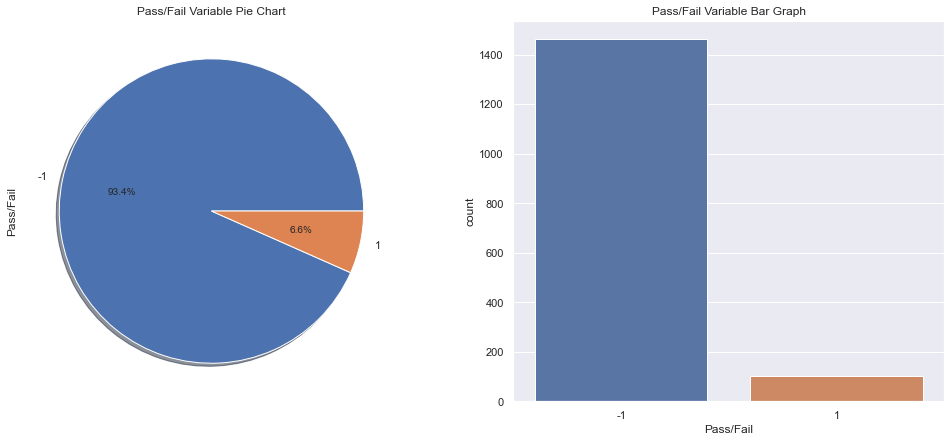

In [20]:
univariate_analysis_piechart_bargraph(data, "Pass/Fail")

**Here we can see that the data is highly unbalanced.**

**Target column “ –1” corresponds to a pass and “1” corresponds to a fail.**

**We have large number of data on pass and very less data on fail**

In [21]:
def univariate_analysis_boxplot_distplot(dataset, criteria):
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = criteria, data=dataset,  orient='h' , ax=axes[1])
    sns.distplot(dataset[criteria],  ax=axes[0])
    axes[0].set_title('Distribution plot')
    axes[1].set_title('Box plot')
    plt.show()
    #checking count of outliers.
    q25,q75=np.percentile(dataset[criteria],25),np.percentile(dataset[criteria],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in dataset[criteria] if i < lower or i > upper]
    
    print(f'Total Number of outliers in {criteria}: {len(Outliers)}')

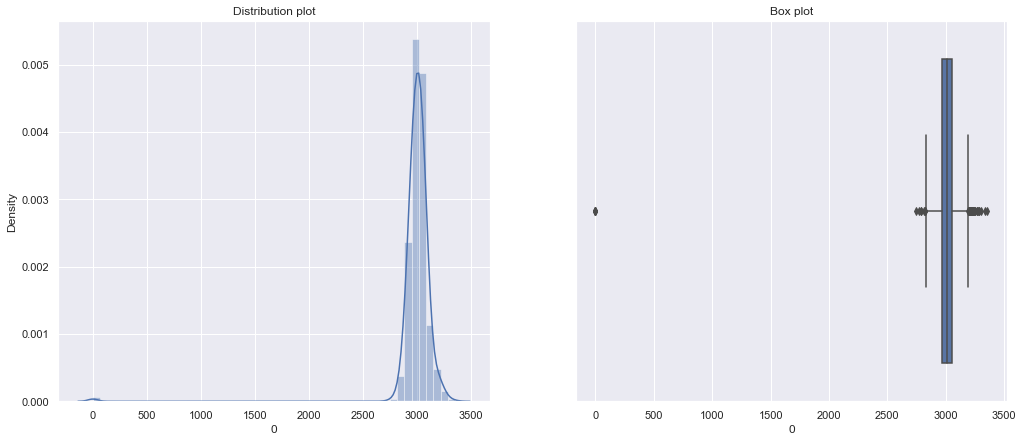

Total Number of outliers in 0: 55


In [22]:
univariate_analysis_boxplot_distplot(data, "0")

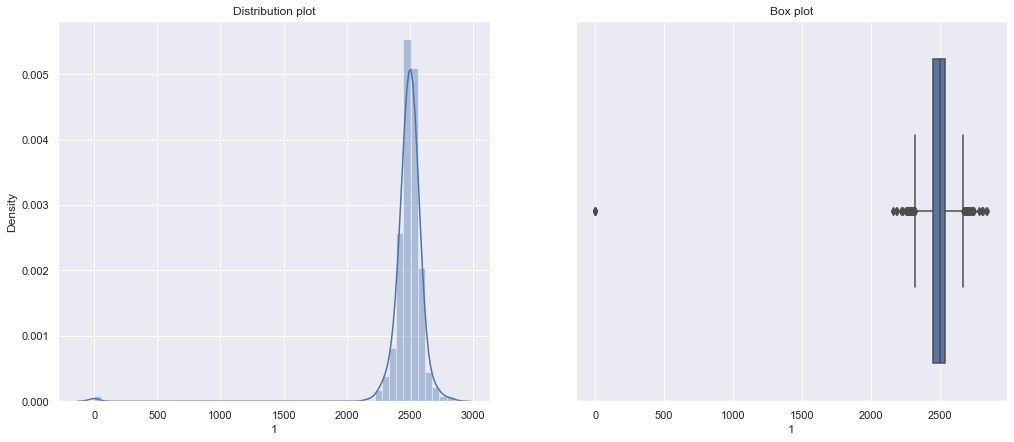

Total Number of outliers in 1: 91


In [23]:
univariate_analysis_boxplot_distplot(data, "1")

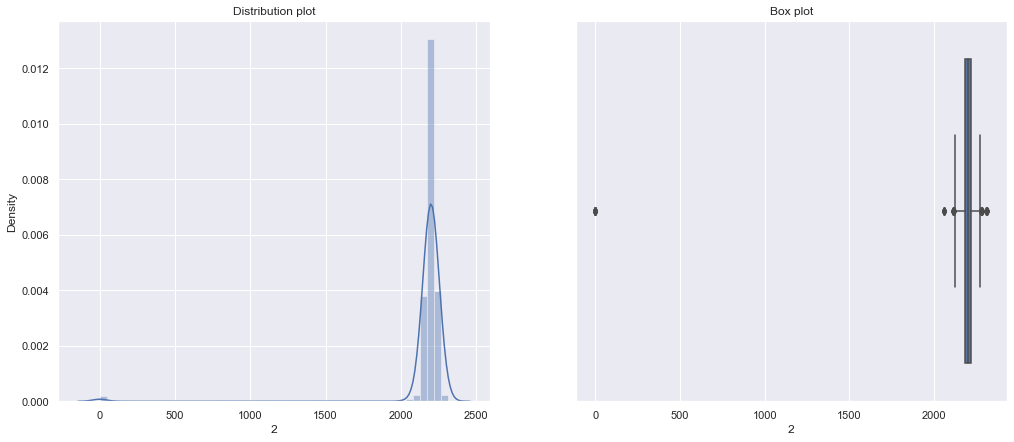

Total Number of outliers in 2: 39


In [24]:
univariate_analysis_boxplot_distplot(data, "2")

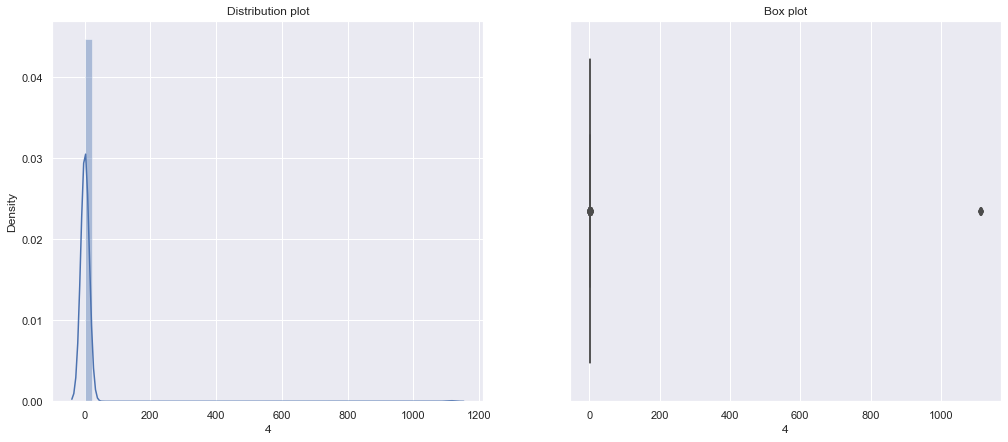

Total Number of outliers in 4: 62


In [25]:
univariate_analysis_boxplot_distplot(data, "4")

**As we can see that there is large amount skewness and outliers in the data**

In [26]:
def bivariate_boxplot_bargraph(data,criteria, criteria2):
    f,axes=plt.subplots(1,2,figsize=(17,7))
    sns.boxplot(x=criteria, y=criteria2, data= data, ax=axes[0])
    sns.barplot(x=criteria, y=criteria2, data= data, ax=axes[1])
    axes[0].set_title(f'{criteria} Variable Pie Chart with hue {criteria2}')
    axes[1].set_title(f'{criteria} Variable Bar Graph  with hue {criteria2}')
    plt.show()

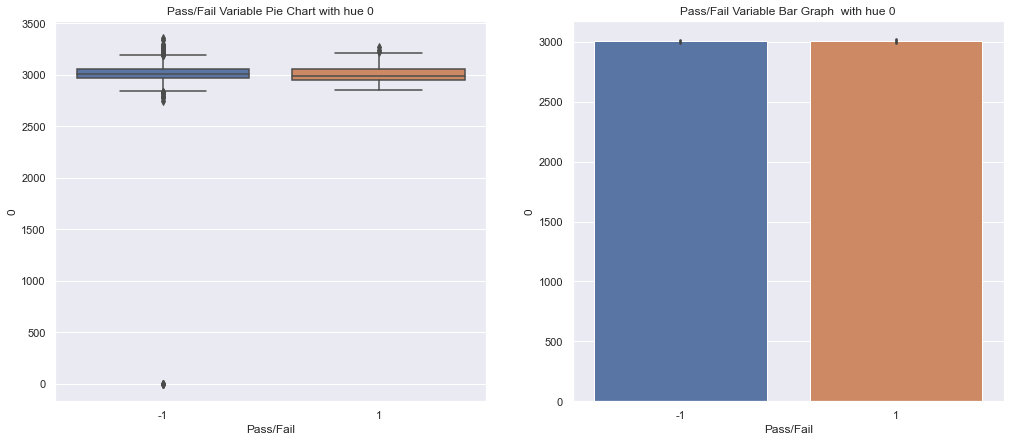

In [27]:
bivariate_boxplot_bargraph(data, "Pass/Fail", "0")

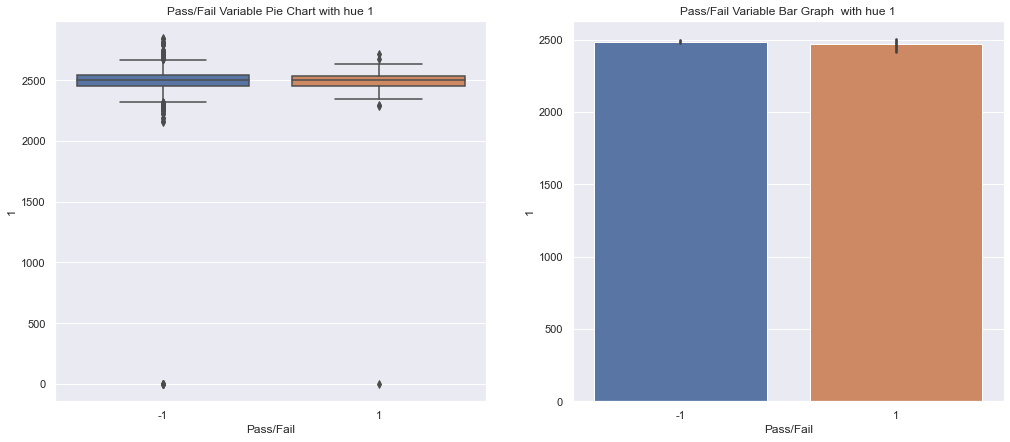

In [28]:
bivariate_boxplot_bargraph(data, "Pass/Fail", "1")

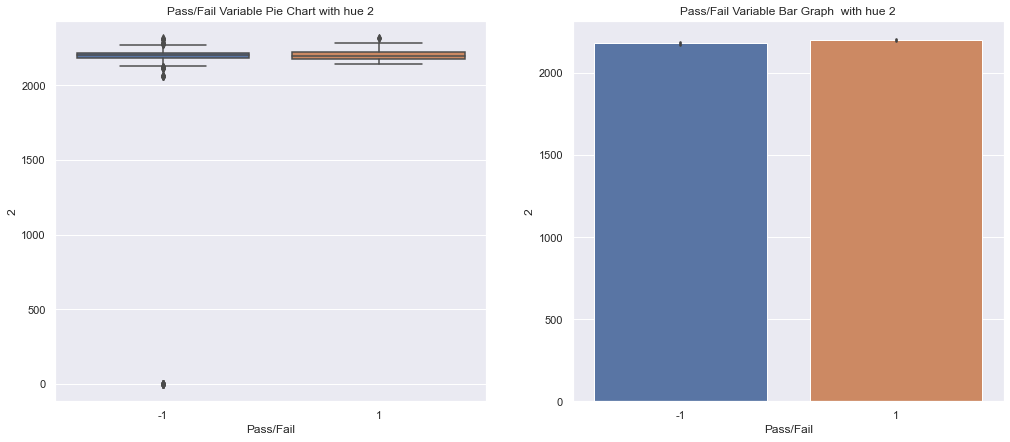

In [29]:
bivariate_boxplot_bargraph(data, "Pass/Fail", "2")

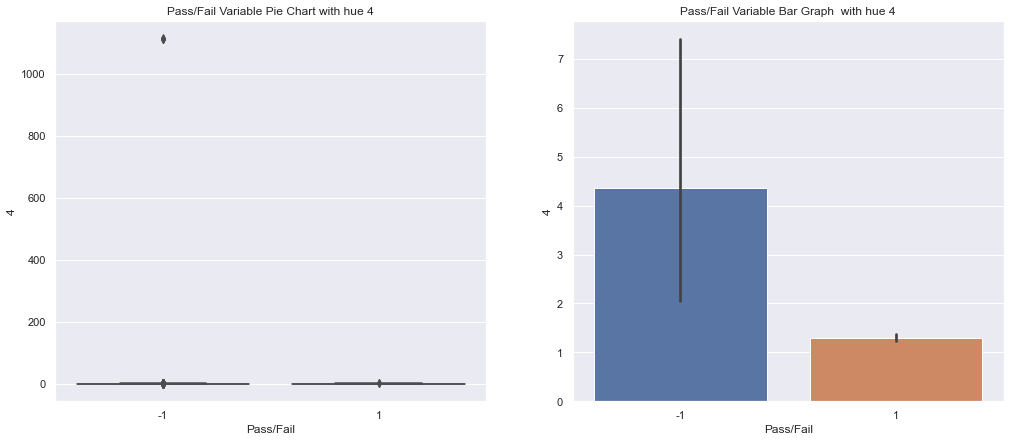

In [30]:
bivariate_boxplot_bargraph(data, "Pass/Fail", "4")

**As we can see that many of the columns are not good in deciding the pass/fails**

**The distribution is overlapping for pass and fails**

In [31]:
data.columns

Index(['0', '1', '2', '3', '4', '8', '9', '10', '11', '13',
       ...
       '565', '570', '571', '572', '582', '583', '586', '587', '589',
       'Pass/Fail'],
      dtype='object', length=297)

In [32]:
df_pairplot= data.iloc[:,:10]

sns.pairplot(df_pairplot,diag_kind='hist',corner=True)

Error in callback <function flush_figures at 0x7fabee88bb80> (for post_execute):


KeyboardInterrupt: 

Text(0.5, 1.0, 'Correlation heatmap for the Data')

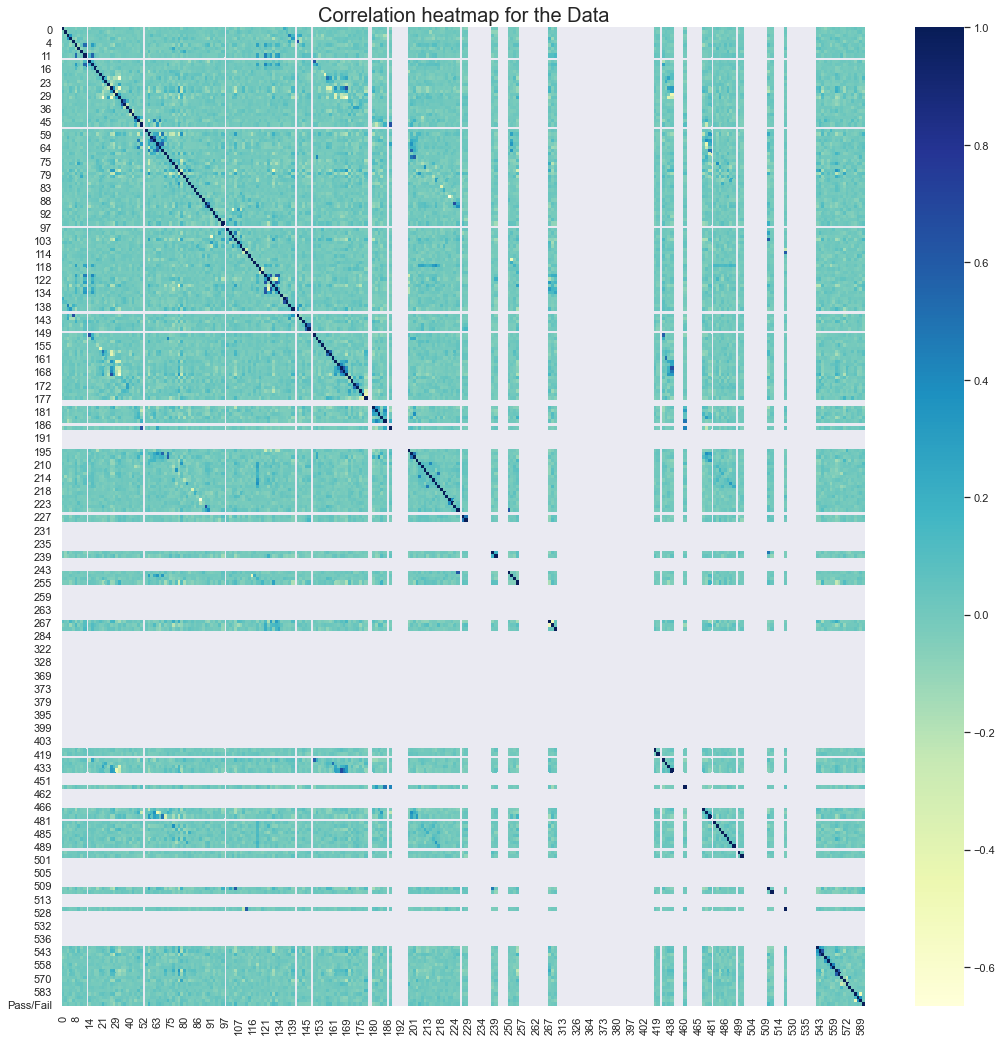

In [33]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

**Since we have already removed highly correlated data, we can see that there are lesser correlated data**

----------------------

### 4. Data pre-processing:

**• Segregate predictors vs target attributes**

**• Check for target balancing and fix it if found imbalanced.**

**• Perform train-test split and standardise the data or vice versa if required.**

**• Check if the train and test data have similar statistical characteristics when compared with original data.**

In [34]:
x = data.iloc[:,:296]
y = data["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 296)
shape of y: (1567,)


**• Check for target balancing and fix it if found imbalanced.**

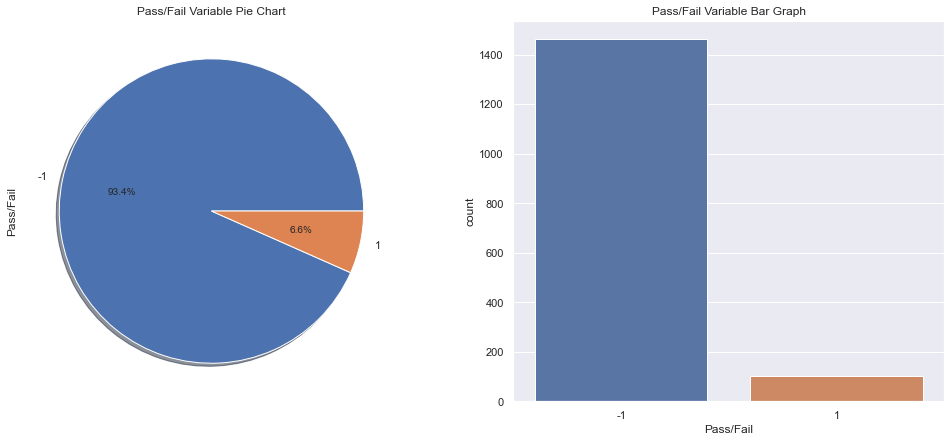

In [35]:
univariate_analysis_piechart_bargraph(data, "Pass/Fail")

In [36]:
smote_nc=SMOTE(random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(x,y)

In [37]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
-1    1463
 1     104
Name: Pass/Fail, dtype: int64


In [38]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
-1    1463
 1    1463
Name: Pass/Fail, dtype: int64


In [39]:
x_s.isnull().sum().sum()

0

**• Perform train-test split and standardise the data or vice versa if required.**


In [40]:
# splitting them into train test and split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# gettiing the shapes
print("Un-Sampled data")
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)


x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_s, y_s, test_size = 0.3, random_state = 1)

# gettiing the shapes
print("Sampled data")
print("shape of x_train: ", x_train_s.shape)
print("shape of x_test: ", x_test_s.shape)
print("shape of y_train: ", y_train_s.shape)
print("shape of y_test: ", y_test_s.shape)

Un-Sampled data
shape of x_train:  (1096, 296)
shape of x_test:  (471, 296)
shape of y_train:  (1096,)
shape of y_test:  (471,)
Sampled data
shape of x_train:  (2048, 296)
shape of x_test:  (878, 296)
shape of y_train:  (2048,)
shape of y_test:  (878,)


In [41]:
# standardization
# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# We have included scaling in the pipeline, Hence we wont be scaling the sampled data
# x_train_s = sc.fit_transform(x_train_s)
# x_test_s = sc.transform(x_test_s)

**We have included scaling in the pipeline, Hence we wont be scaling the sampled data**


**• Check if the train and test data have similar statistical characteristics when compared with original data.**

In [42]:
# gettiing the shapes
print("Un-Sampled data")
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

# gettiing the shapes
print("Sampled data")
print("shape of x_train: ", x_train_s.shape)
print("shape of x_test: ", x_test_s.shape)
print("shape of y_train: ", y_train_s.shape)
print("shape of y_test: ", y_test_s.shape)

Un-Sampled data
shape of x_train:  (1096, 296)
shape of x_test:  (471, 296)
shape of y_train:  (1096,)
shape of y_test:  (471,)
Sampled data
shape of x_train:  (2048, 296)
shape of x_test:  (878, 296)
shape of y_train:  (2048,)
shape of y_test:  (878,)


In [43]:
print('y_train_s sampling:')
print(y_train_s.value_counts())
print('y_test_s sampling:')
print(y_test_s.value_counts())

y_train_s sampling:
 1    1029
-1    1019
Name: Pass/Fail, dtype: int64
y_test_s sampling:
-1    444
 1    434
Name: Pass/Fail, dtype: int64


In [44]:
x_s.describe()

,0,1,2,3,4,8,9,10,11,13,...,562,565,570,571,572,582,583,586,587,589
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.0,...,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000
mean,3001.776436,2482.096537,2189.673053,1370.385270,2.827280,1.466965,-0.001926,0.000220,0.962659,0.0,...,202.202233,0.118531,529.125924,2.100473,23.715513,0.500064,0.015376,0.021585,0.017026,99.154098
std,153.204417,181.264104,154.267275,387.293332,41.076926,0.074023,0.013526,0.008514,0.027289,0.0,...,100.486368,0.094189,22.353654,0.285849,69.929007,0.009803,0.013091,0.010970,0.008288,80.485741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053400,-0.034900,0.000000,0.0,...,0.000000,0.000000,317.196400,0.980200,3.540000,0.000000,0.000000,-0.016900,0.000000,0.000000
25%,2961.334528,2453.491308,2181.188900,1104.806654,1.064700,1.428011,-0.010488,-0.004800,0.957200,0.0,...,156.338006,0.064639,530.899400,1.990425,7.645731,0.498200,0.011700,0.014710,0.011300,50.600975
50%,2997.795624,2497.580000,2198.485674,1288.085700,1.303746,1.467000,-0.002285,0.000901,0.964100,0.0,...,260.211248,0.095605,532.420877,2.141700,8.798509,0.500338,0.013900,0.020845,0.015739,76.615926
75%,3048.355000,2534.371113,2215.843367,1579.879826,1.485942,1.511108,0.005855,0.005670,0.969600,0.0,...,264.272000,0.166475,534.150000,2.295568,10.089193,0.502324,0.016700,0.027500,0.020915,117.900882
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,1.656400,0.074900,0.053000,0.984800,0.0,...,311.404000,0.689200,589.508200,2.739500,454.560000,0.509800,0.476600,0.102800,0.079900,737.304800


In [45]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
count,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1096.0,...,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03,1.096000e+03
mean,-1.825790e-15,-2.762186e-15,-9.245696e-16,-1.418168e-17,-4.460898e-17,9.152756e-16,-4.376062e-17,5.409298e-17,1.468159e-15,0.0,...,5.405753e-16,-1.519972e-16,-1.695623e-15,1.381802e-15,-3.558082e-17,4.562728e-15,-1.021777e-16,3.159729e-16,-1.489077e-16,1.120353e-16
std,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,0.0,...,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00
min,-1.535479e+01,-1.336611e+01,-1.152217e+01,-3.068868e+00,-7.538250e-02,-1.512694e+01,-3.418629e+00,-3.706935e+00,-2.220206e+01,0.0,...,-2.118332e+00,-1.300661e+00,-1.286803e+01,-4.021080e+00,-2.836542e-01,-3.228820e+01,-1.018719e+00,-2.204840e+00,-1.788063e+00,-1.045517e+00
25%,-1.984389e-01,-1.831429e-01,-1.894175e-02,-6.754960e-01,-5.781365e-02,-5.158039e-01,-6.542373e-01,-6.153878e-01,-1.009546e-01,0.0,...,3.480628e-01,-3.674868e-01,-1.456058e-02,-4.285942e-01,-2.365849e-01,-1.135806e-01,-2.380938e-01,-6.620602e-01,-6.657830e-01,-5.909975e-01
50%,4.299285e-02,7.521050e-02,8.401211e-02,-2.196680e-01,-5.269689e-02,1.465393e-02,-3.956676e-02,4.466882e-02,7.781960e-02,0.0,...,4.865617e-01,-3.240834e-01,9.888759e-02,5.758119e-02,-2.218889e-01,2.861335e-02,-9.340902e-02,-9.051233e-02,-1.909720e-01,-3.052279e-01
75%,2.786106e-01,2.897631e-01,1.767830e-01,4.497790e-01,-4.904581e-02,5.831495e-01,6.141305e-01,6.483104e-01,2.012315e-01,0.0,...,4.900855e-01,5.426292e-01,2.233755e-01,6.728941e-01,-2.048378e-01,1.708073e-01,9.165296e-02,5.050165e-01,4.484041e-01,1.707319e-01
max,1.424907e+00,1.750319e+00,6.312036e-01,4.949082e+00,1.911474e+01,2.017456e+00,4.926581e+00,4.134763e+00,5.149513e-01,0.0,...,9.511355e-01,6.000884e+00,3.722848e+00,2.286799e+00,5.094218e+00,6.620228e-01,3.105420e+01,6.492280e+00,6.834072e+00,6.569493e+00


In [46]:
pd.DataFrame(x_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.0,...,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,-0.020117,-0.000672,-0.064074,-0.011446,-0.012522,-0.016861,0.000378,0.071870,0.049538,0.0,...,0.067164,0.013524,-0.086499,-0.017880,0.044480,0.047249,0.038045,-0.036585,-0.037811,-0.055773
std,1.075556,0.980460,1.312291,1.054170,0.881602,0.767404,0.940772,1.153310,0.209756,0.0,...,0.947260,0.998487,1.335864,0.962501,1.093258,0.221912,1.456030,0.960685,0.825645,0.894104
min,-15.354795,-13.366107,-11.522168,-3.068868,-0.075382,-2.701290,-2.599068,-3.932596,-0.460810,0.0,...,-2.118332,-1.300661,-13.584310,-4.037256,-0.268153,-1.406253,-0.581300,-3.076150,-1.334835,-1.045517
25%,-0.184281,-0.156260,-0.026985,-0.679289,-0.058584,-0.542197,-0.618463,-0.660520,-0.106722,0.0,...,0.357269,-0.349040,-0.022734,-0.440097,-0.235482,-0.094191,-0.244823,-0.610101,-0.611827,-0.536612
50%,0.010920,0.080375,0.086767,-0.258872,-0.053161,-0.035028,-0.003792,0.072876,0.076666,0.0,...,0.486562,-0.320828,0.076617,0.033677,-0.224631,0.060930,-0.090044,-0.070528,-0.190972,-0.297988
75%,0.243534,0.290570,0.175494,0.470343,-0.049504,0.553392,0.565347,0.716008,0.208152,0.0,...,0.493511,0.452296,0.204623,0.673343,-0.205792,0.190197,0.084923,0.461051,0.289235,0.076201
max,1.800484,1.945694,0.689515,5.160182,19.079201,1.668647,3.202902,5.985179,0.461896,0.0,...,0.834982,6.177753,2.482748,2.286799,4.989766,0.662023,30.704269,6.492280,3.672263,6.569493


<AxesSubplot:>

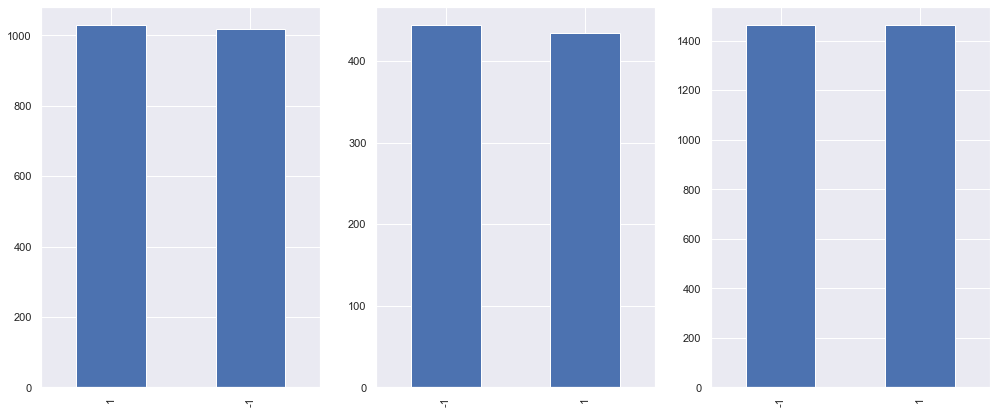

In [47]:
# sns.countplot(data=y_train_s)
f,axes=plt.subplots(1,3,figsize=(17,7))

pd.value_counts(y_train_s).plot.bar(ax=axes[0])
pd.value_counts(y_test_s).plot.bar(ax=axes[1])
pd.value_counts(y_s).plot.bar(ax=axes[2])

**Here we can see that the training, testing, and initial data are having similar statistical distribution**

**The training, testing, and initial data are having counts of pass/fail**

**Hence we can say that the training, testing, and initial data are habing similar statistical characteristics when compared with original data.**

---------------

### 5. Model training, testing and tuning:

**• Model training:**

    - Pick up a supervised learning model.
    - Train the model.
    - Use cross validation techniques.
            Hint: Use all CV techniques that you have learnt in the course.
    - Apply hyper-parameter tuning techniques to get the best accuracy.
            Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
    - Use any other technique/method which can enhance the model performance.
            Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
    - Display and explain the classification report in detail.
    - Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies.
            Hint: You can use your concepts learnt under Applied Statistics module.
    - Apply the above steps for all possible models that you have learnt so far.

**• Display and compare all the models designed with their train and test accuracies.**

**• Select the final best trained model along with your detailed comments for selecting this model.**

**• Pickle the selected model for future use.**

**• Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.**

**• Model training:**

    - Pick up a supervised learning model.
    - Train the model.
    - Use cross validation techniques.
            Hint: Use all CV techniques that you have learnt in the course.
    - Apply hyper-parameter tuning techniques to get the best accuracy.
            Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
    - Use any other technique/method which can enhance the model performance.
            Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
    - Display and explain the classification report in detail.
    - Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies.
            Hint: You can use your concepts learnt under Applied Statistics module.
    - Apply the above steps for all possible models that you have learnt so far.


**- Pick up a supervised learning model.**

**- Train the model.**

In [48]:
log=LogisticRegression(max_iter=1000,random_state=42)
k=KNeighborsClassifier()
gbc =GradientBoostingClassifier(random_state=42)
svc = SVC(random_state=42)
rfc = RandomForestClassifier(random_state=42,n_estimators=10)
xg_clf = XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50,random_state=42)
lgb = LGBMClassifier(random_state=42)
algorithms=[k,log,gbc,rfc,svc,xg_clf,lgb]
names=['KNeighborsClassifier','Logistic','GradientBoost','RandomForest','SVC','xgboost','LGB']

**- Use cross validation techniques.**

**- Apply hyper-parameter tuning techniques to get the best accuracy.**


In [49]:
def crossvalidate(clf, X, y):
    
    scores={'ACCURACY':'accuracy', 
           'RECALL':'recall',
           'PRECISION':'precision',
           'F1':'f1'}
    
    model = Pipeline([
        ("scaling", sc),
        ('classification', clf)])
    
    skf = StratifiedKFold(n_splits=5,random_state=None,shuffle=True)

    crossvalidate = cross_validate(model, X, y, scoring= scores,cv=skf)
    score=pd.DataFrame(crossvalidate).mean()
    return score

In [50]:
clf=LogisticRegression(max_iter=1000,random_state=42)
crossvalidate(clf, x_train_s, y_train_s)

fit_time          0.094085
score_time        0.009788
test_ACCURACY     0.884754
test_RECALL       0.938764
test_PRECISION    0.848219
test_F1           0.890950
dtype: float64

**Logistic regression :**

**Here we can see that accuracy is 87.54, which is fair**

**We can see that recall is higher than precision here.** 
**Precision quantifies the number of positive class predictions that actually belong to the positive class. Recall quantifies the number of positive class predictions made out of all positive examples in the dataset. **

**F1 score here is fair enough**

**Lets iterate over the other model and find out the comapare the models**

In [51]:
def cross_vali_fit_pred(X_train, y_train, algorithms = algorithms, names = names):
    metrics=pd.DataFrame()
    for i in range(len(algorithms)):        
        scr=crossvalidate(algorithms[i],X_train,y_train)
        metrics=metrics.append(scr[2:],ignore_index=True)
    metrics.index=names
    metrics.columns=['ACCURACY','F1','PRECISION','RECALL']
    return metrics.sort_values(by=['F1'],ascending=False)

In [52]:
cross_vali_fit_pred(x_train_s, y_train_s, algorithms = algorithms, names = names)

[13:47:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

,ACCURACY,F1,PRECISION,RECALL
SVC,0.987308,0.987502,0.978117,0.997087
LGB,0.976076,0.976164,0.976746,0.975714
GradientBoost,0.968259,0.968636,0.962731,0.974738
RandomForest,0.951674,0.951210,0.965120,0.937803
xgboost,0.949701,0.950140,0.946088,0.954331
Logistic,0.879864,0.887332,0.837886,0.943642
KNeighborsClassifier,0.616699,0.723952,0.567382,1.000000


**Here we can see that SVC and LGB is giving best results**

**SVC and LGB has better accuracy, f1score , precision and recall when compared to other models**

SVC f1 score = 0.989912 
LGB f1 score = 0.975685	 

**Let use these 2 model for future comparision and analysis**

In [53]:
from sklearn.model_selection import RandomizedSearchCV
def Randomsearch(clf, X_train,Y_train,X_test,Y_test,params,cv_type):
    
    model = Pipeline([
    ("scaling", sc),
    ('classification', clf)])
    
    if cv_type == 'random':
        CV=RandomizedSearchCV(model, params, cv=5,scoring='f1',n_iter=20,random_state=42)
    elif cv_type == 'grid':
        CV = GridSearchCV(model, params, cv=5,scoring='f1')

    CV.fit(X_train, Y_train)
    y_pred=CV.predict(X_test)
    f1score=f1_score(Y_test, y_pred, average='macro')
    return CV,y_pred,f1score

In [54]:
params=[{'classification__C': [0.1, 1, 10, 100, 1000],
              'classification__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'classification__kernel': ['rbf']},
 {
    'classification__n_estimators': [400, 700, 1000],
    'classification__colsample_bytree': [0.7, 0.8],
    'classification__max_depth': [15,20,25],
    'classification__num_leaves': [50, 100, 200],
    'classification__reg_alpha': [1.1, 1.2, 1.3],
    'classification__reg_lambda': [1.1, 1.2, 1.3],
    'classification__min_split_gain': [0.3, 0.4],
    'classification__subsample': [0.7, 0.8, 0.9],
    'classification__subsample_freq': [20]
}]



In [55]:
classifiers=[('SVC',
              SVC(random_state=42)),
             ('LGB Classifier',
              LGBMClassifier(random_state=42))]

In [56]:
# for param, classifier in zip(params, classifiers):
    
#     print("Working on {}...".format(classifier[0]))
    
#     clf,y_pred,f1score = Randomsearch(classifier[1], x_train_s, y_train_s,x_test_s,y_test_s, param,'random') 
    
#     print("Best parameter for {} is {}".format(classifier[0], clf.best_params_))
    
#     #
#     print("Best `F1` for {} is {}".format(classifier[0], f1score))
    
#     print('-'*50)
    
#     print('\n')

**We can see that with parameters 'classification__kernel': 'rbf', 'classification__gamma': 0.01, 'classification__C': 1000, we are getting `F1` for SVC is 0.9988609281489563**

**We can see that with parameters 'classification__subsample_freq': 20, 'classification__subsample': 0.7, 'classification__reg_lambda': 1.3, 'classification__reg_alpha': 1.1, 'classification__num_leaves': 50, 'classification__n_estimators': 700, 'classification__min_split_gain': 0.4, 'classification__max_depth': 15, 'classification__colsample_bytree': 0.7 , we are getting `F1` for LGB Classifier is 0.9703718701491529**

**Hence we can infer on above analysis that with SVC we are getting best results among the models we have taken into consideration**


In [57]:
# # Commenting as grid search is taking too much time and results is similar to Randomsearch
# for param, classifier in zip(params, classifiers):
    
#     print("Working on {}...".format(classifier[0]))
    
#     clf,y_pred,f1score = Randomsearch(classifier[1], x_train_s, y_train_s,x_test_s,y_test_s, param,'grid') 
    
#     print("Best parameter for {} is {}".format(classifier[0], clf.best_params_))
    
#     #
#     print("Best `F1` for {} is {}".format(classifier[0], f1score))
    
#     print('-'*50)
    
#     print('\n')

**Grid search cv also providing similar results but the random search cv has letter time of execution**

**Grid search cv is taking far more execution time**

-------------------

**We have already tried out attribute removal,standardisation/normalisation, target balancing. Lets try dimensionality reduction and attribute removal**

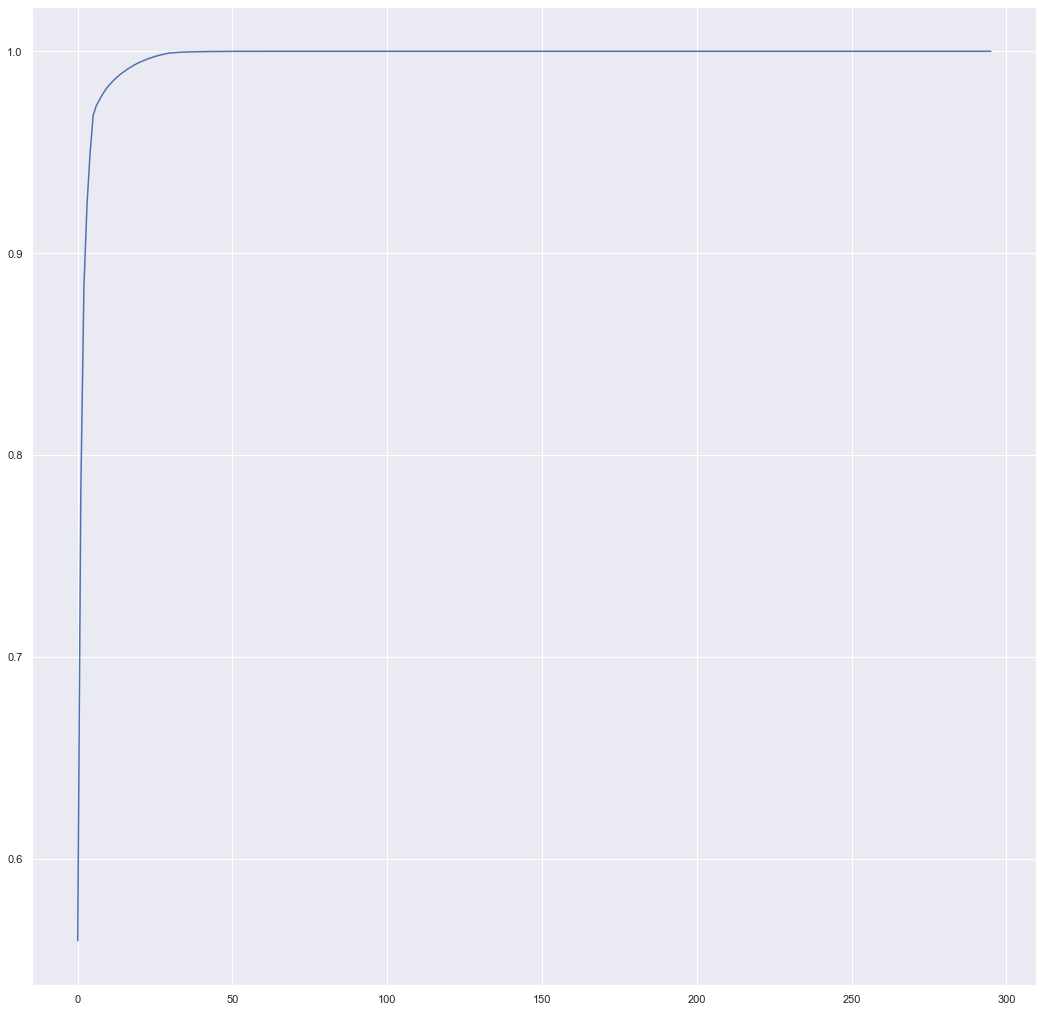

In [58]:
pca = PCA().fit(x_train_s)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [59]:
#Based on the plot, we will select 25 components
pca = PCA(n_components=25)
pca.fit(x_train_s)

#Assign the components to the X variable
x_transformed = pca.transform(x_s)
x_train_res_pca, x_test_res_pca, y_train_res_pca, y_test_res_pca = train_test_split(x_transformed, y_s, test_size=0.30, random_state=1)


In [60]:
x_transformed.shape

(2926, 25)

In [61]:
x_train_res_pca_s = sc.fit_transform(x_train_res_pca)
x_test_res_pca_s = sc.transform(x_test_res_pca)


In [62]:
for param, classifier in zip(params, classifiers):
    
    print("Working on {}...".format(classifier[0]))
    
    clf,y_pred,f1score = Randomsearch(classifier[1], x_train_res_pca_s, y_train_res_pca,x_test_res_pca_s,y_test_res_pca, param,'random') 
    
    print("Best parameter for {} is {}".format(classifier[0], clf.best_params_))
    
    #
    print("Best `F1` for {} is {}".format(classifier[0], f1score))
    
    print('-'*50)
    
    print('\n')

Working on SVC...
Best parameter for SVC is {'classification__kernel': 'rbf', 'classification__gamma': 0.1, 'classification__C': 100}
Best `F1` for SVC is 0.9931661451766062
--------------------------------------------------


Working on LGB Classifier...
Best parameter for LGB Classifier is {'classification__subsample_freq': 20, 'classification__subsample': 0.9, 'classification__reg_lambda': 1.1, 'classification__reg_alpha': 1.1, 'classification__num_leaves': 100, 'classification__n_estimators': 1000, 'classification__min_split_gain': 0.3, 'classification__max_depth': 20, 'classification__colsample_bytree': 0.8}
Best `F1` for LGB Classifier is 0.9646913378451831
--------------------------------------------------




**After reducing the dimension from 296 to 25, we are getting f1 score of 0.9931661451766062 for SVC. This is good enough f1 score**

**We were able to reduce the dimension significantly here.**

-----------

**- Display and explain the classification report in detail.**

Prediction: [-1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1
  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1
 -1  1  1 -1 -1  1  1  1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1
 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1
 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1
  1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1
 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1
  1  1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1 -1  1 -1  1
 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1
 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1  1 -1
  1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1 -1  1  1 -1 -1
 -1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1
  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1

SVC(C=100, gamma=0.1)

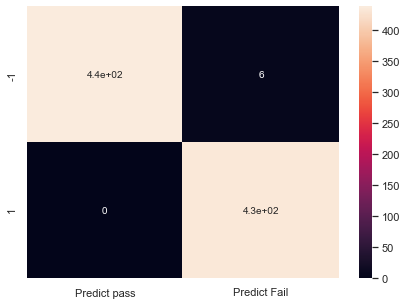

In [63]:
def svm_analysis(x_train,y_train,x_test,y_test):
    clf = svm.SVC(gamma=0.1, C=100,kernel = 'rbf')    
    ############################################################################################
    # Design and train a Naive Bayes Classifier
    ############################################################################################

    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    print('Prediction: {}'.format(prediction))

    ############################################################################################
    # Display the classification accuracies for train and test data.
    ############################################################################################

    print('With SVM accuracy of train data is: ',clf.score(x_train,y_train)) # accuracy
    print('With SVM accuracy of test data is: ',clf.score(x_test,y_test)) # accuracy


    ############################################################################################
    #Display and explain the classification report in detail.
    ############################################################################################

    # Confusion Matrix
    from sklearn import metrics

    predicted_labels = clf.predict(x_test)
    print("Confusion Matrix")
    cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[-1,1])

    df_cm = pd.DataFrame(cm, index = [i for i in [-1,1]],
                      columns = [i for i in ["Predict pass", "Predict Fail"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)


    # Classification Report
    print('\n{}'.format(classification_report(y_test, prediction)))
    
    return clf
    
svm_analysis(x_train_res_pca_s,y_train_res_pca,x_test_res_pca_s,y_test_res_pca)



**After the demensionality reduction the parameter are :**



**- Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies.**

### ANSWER : 

We have already used the stratified k fold technique and found out the result as below : 

Here wee have tried out different training and testing dataset for the purpose with stratified k fold . 

|	MODEL	|	ACCURACY	|	F1	|	PRECISION	|	RECALL	|
| --- | --- | --- | --- | --- |
|	SVC	|	0.985839	|	0.986116	|	0.972641	|	1.000000	|
|	LGB	|	0.980471	|	0.980428	|	0.985463	|	0.975714	|	
|	GradientBoost	|	0.964353	|	0.964863	|	0.956153	|	0.973758	|
|	RandomForest	|	0.950193	|	0.949738	|	0.963232	|	0.936851	|	
|	xgboost	|	0.947269	|	0.947777	|	0.943404	|	0.952399	|
|	Logistic	|	0.881832	|	0.889449	|	0.839742	|	0.945546	|	
|	KNeighborsClassifier	|	0.610844	|	0.720852	|	0.563549	|	1.000000	|	



## CONCLUSION ON MODEL SELECTION : 

**• Display and compare all the models designed with their train and test accuracies.**

**• Select the final best trained model along with your detailed comments for selecting this model.**

Reference: 

**Precision:** When it predicts the positive result, how often is it correct? i.e. limit the number of false positives.

**Recall:** When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.

**Precision quantifies the number of positive class predictions that actually belong to the positive class. Recall quantifies the number of positive class predictions made out of all positive examples in the dataset. **


### Comparing All Models:

|	MODEL	|	ACCURACY	|	F1	|	PRECISION	|	RECALL	|
| --- | --- | --- | --- | --- |
|	SVC	|	0.987792	|	0.987989	|	0.977201	|	0.999029	|
|	LGB	|	0.979974	|	0.980092	|	0.980860	|	0.979583	|	
|	GradientBoost	|	0.964846	|	0.965202	|	0.959684	|	0.970860	|
|	RandomForest	|	0.953607	|	0.953359	|	0.964430	|	0.942652	|	
|	xgboost	|	0.948732	|	0.949334	|	0.942626	|	0.956278	|
|	Logistic	|	0.877438	|	0.885142	|	0.836867	|	0.939749	|	
|	KNeighborsClassifier	|	0.618148	|	0.724786	|	0.568462	|	1.000000	|	


**We have tried out below steps and conclusions are below :**

### Model training 
    
**We trained the above list of models and found out that SVM and Light gbm is giving us best results in terms of precision,recall, accuracy and f1 scores as seen in above table**


### Cross Validation Techniques.

**We used different cross validation techniques like:**
    - GRID SEARCH CV
    - RANDOM SEARCH CV

**We have averaged out the result and publish as in th table**

**Here also SVC and LGB has given best results compared to other models**

### HYPER TUNING

**We used hypertuning models to find out best parameters:**

SVC...
Best parameter for SVC is {'classification__kernel': 'rbf', 'classification__gamma': 0.01, 'classification__C': 1000}
Best `F1` for SVC is 0.9988609281489563

--------------------------------------------------

LGB Classifier...
Best parameter for LGB Classifier is {'classification__subsample_freq': 20, 'classification__subsample': 0.7, 'classification__reg_lambda': 1.3, 'classification__reg_alpha': 1.1, 'classification__num_leaves': 50, 'classification__n_estimators': 700, 'classification__min_split_gain': 0.4, 'classification__max_depth': 15, 'classification__colsample_bytree': 0.7}
Best `F1` for LGB Classifier is 0.9703718701491529

--------------------------------------------------

### DIMENSIONALITY REDUCTION

**After reducing the dimension from 296 to 25, we are getting f1 score of 0.9931661451766062 for SVC. This is good enough f1 score**

**We were able to reduce the dimension significantly here.**


### ATTRIBUTE REMOVAL

**We removed highly colinear data with collinearity greater than 0.7**

**We removed the columns with more than 25% missing data**

### Standardisation/Normalisation

**We standardised the data and scaled it.**

### Target Balancing

**We performed target balancing with SMOTE and balanced the data. We had checked the statistical characteristics of training, testing and original data**


### Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies.

**We have used the stratified k fold technique and found out the result.**

**Here wee have tried out different training and testing dataset for the purpose with stratified k fold .**

------------------------------------------------------

# CONCLUSION

### SVM has shown the best results among the model with the accuracy of 0.9988609281489563

-----------------------------------------------------------------------------

**• Pickle the selected model for future use.**

**• Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.**

In [64]:
svm_model = svm.SVC(gamma=0.01, C=1000,kernel = 'rbf')  
final_model = Pipeline([
                        ("scaling", sc),
                        ('classification', svm_model)])

final_model.fit(x_train_s,y_train_s)
y_pred=final_model.predict(x_test_s)


print('With SVM accuracy of train data is: ',final_model.score(x_train_s,y_train_s)) # accuracy
print('With SVM accuracy of test data is: ',final_model.score(x_test_s,y_test_s)) # accuracy



With SVM accuracy of train data is:  1.0
With SVM accuracy of test data is:  0.9988610478359908


In [65]:
# save the model to disk
pickle.dump(final_model, open("finalized_model.sav", 'wb'))


def predict_result(model_file,data_file):

    # load the model from disk
    loaded_model = pickle.load(open(model_file, 'rb'))

    numerical_ix = x_train_s.columns.astype(int)
    test_data = pd.read_excel(data_file)
    test_data = test_data[numerical_ix]
    test_data= test_data.replace(np.nan,0)
    test_data = test_data.astype(float)

    # loaded_model.fit(x_train_s, y_train_s)
    prediction = loaded_model.predict(test_data)
    print('Prediction: {}'.format(prediction))


predict_result("finalized_model.sav","Future_predictions.xlsx")

Prediction: [-1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1]


**Here by using the predict_result function and passing the saves model file and data file, we get the predicted results.**

----------------------------

## 6. Conclusion and improvisation:
**• Write your conclusion on the results.**

## Improvisation

Summarize dataset:   0%|          | 0/605 [00:00<?, ?it/s]

KeyboardInterrupt: 

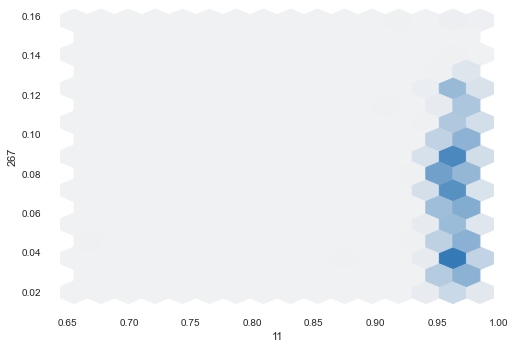

In [66]:
import pandas_profiling 

pandas_profiling.ProfileReport(df1)